In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [7]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

def auto_select_accelerator():
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.experimental.TPUStrategy(tpu)
        print("Running on TPU:", tpu.master())
    except ValueError:
        strategy = tf.distribute.get_strategy()
    print(f"Running on {strategy.num_replicas_in_sync} replicas")

    return strategy

In [8]:
#checking the GPU we got from the Kaggle Kernal
!nvidia-smi



#checking the Tensorflow Version
tf.__version__

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



'2.8.0'

In [9]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [11]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/machine learning projects/training set/Tomato leaf disease detection/tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/machine learning projects/training set/Tomato leaf disease detection/tomato/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 984 images belonging to 10 classes.


In [12]:
svm = tf.keras.models.Sequential()

# Step 1 - Convolution
svm.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[224, 224, 3]))

# Step 2 - Pooling
svm.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
svm.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
svm.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
svm.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
svm.add(tf.keras.layers.Dense(units=128, activation='relu'))

svm.add(Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
svm.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])


svm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [13]:
svm.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])
r=svm.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
313/313 [==============================] - 2875s 9s/step - loss: 1.1393 - accuracy: 0.4636 - val_loss: 1.0508 - val_accuracy: 0.6291
Epoch 2/10
313/313 [==============================] - 286s 914ms/step - loss: 1.0258 - accuracy: 0.7112 - val_loss: 1.0244 - val_accuracy: 0.7124
Epoch 3/10
313/313 [==============================] - 286s 912ms/step - loss: 1.0032 - accuracy: 0.7625 - val_loss: 1.0352 - val_accuracy: 0.6707
Epoch 4/10
313/313 [==============================] - 287s 917ms/step - loss: 0.9819 - accuracy: 0.8177 - val_loss: 1.0147 - val_accuracy: 0.7226
Epoch 5/10
313/313 [==============================] - 286s 911ms/step - loss: 0.9749 - accuracy: 0.8323 - val_loss: 0.9649 - val_accuracy: 0.8557
Epoch 6/10
313/313 [==============================] - 285s 908ms/step - loss: 0.9659 - accuracy: 0.8552 - val_loss: 0.9656 - val_accuracy: 0.8638
Epoch 7/10
313/313 [==============================] - 285s 911ms/step - loss: 0.9597 - accuracy: 0.8716 - val_loss: 0.9778 - v

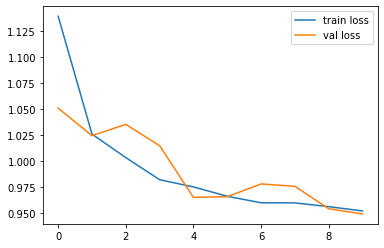

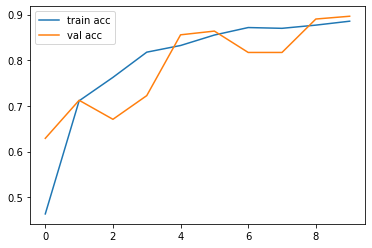

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
from tensorflow.keras.models import load_model

svm.save('SVM_Tomatoleaf.h5')

In [16]:
from tensorflow.keras.models import load_model
model = load_model('SVM_Tomatoleaf.h5')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/machine learning projects/training set/Tomato leaf disease detection/tomato/train/Tomato___Early_blight/0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437.JPG', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = svm.predict(test_image)
result

array([[1.0776595e-01, 8.7087667e-01, 3.2601936e-04, 1.7078219e-05,
        6.2494038e-08, 1.7251723e-02, 1.3858982e-03, 2.3675556e-03,
        2.3638662e-09, 9.0151279e-06]], dtype=float32)